# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import math as math
from scipy import optimize

import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We wish to maximise the utility function wrt. housing and consumption, bounded by cash-on-hand-

4.1666666039527485 0.35000000225770106 0.7358414678061572
     fun: -0.7358414678061572
    nfev: 16
     nit: 9
 success: True
       x: 4.1666666039527485


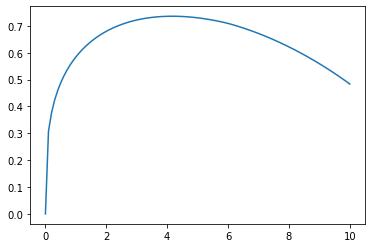

0.5


In [3]:
#define values
values = {"phi": 0.3, "epsilon": 0.5, "r": 0.03, "tau_g": 0.012, "tau_p": 0.004, "p_bar": 3}
m = 0.5
#objetive function
def costs_h(ph, value) :
    """ph(float, int) is the qaulity of housing"""
    return values["r"]*ph+values["tau_g"]*values["epsilon"]*ph+values["tau_p"]*max(values["epsilon"]*ph-values["p_bar"],0)

def utility(house,value,m) :
#Args:
#c (float, int) = level of consumption
#h (float, int) = quality of housing
#values (float, int) = constants
    consumption = m - costs_h(house, value)
    return -(consumption**(1-value["phi"])*(house**(value["phi"])))



#call solver
solution = optimize.minimize_scalar(utility,args=(values,0.5))

#unpack solution
h = solution.x
c = m - costs_h(h, values)
u = -utility(h,values,m)
print(h,c,u)

print(solution)

y_axis = []
x_axis = np.linspace(0,10,100)

for x in x_axis:
    y = -utility(x,values,m)
    y_axis.append(y)

plt.plot(x_axis, y_axis)
plt.show()

print(costs_h(h,values)+c)

# Question 2

We use the solution found in the previous question to plot c* and h*:

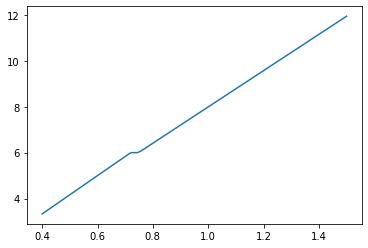

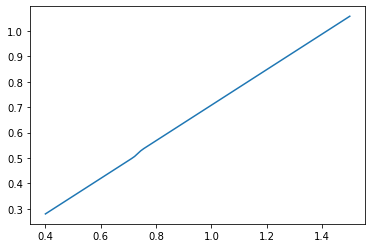

In [4]:
y_h = []
y_c = []

x_m = np.linspace(0.4,1.5,100)

for m in x_m:
    solution_h = optimize.minimize_scalar(utility,args=(values, m))
    y_innerh = solution_h.x
    y_innerc = m - costs_h(y_innerh,values)
    y_h.append(y_innerh)
    y_c.append(y_innerc)
    

    
plt.plot(x_m, y_h)
plt.show()
plt.plot(x_m, y_c)
plt.show()


# Question 3

ADD ANSWER.

[1.18355294 0.54111971 0.5571838  ... 0.47003396 0.65577097 0.40524864]
0.036326803425365865


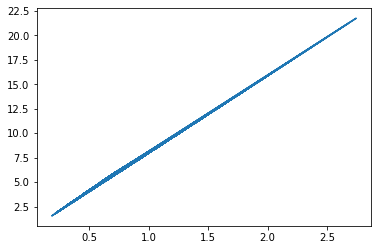

In [5]:
np.random.seed(1) #set seed to 1


N=10000
mi = np.random.lognormal(-0.4,0.35,N)
T = []
hi = []
print(mi)
for i in mi :
    solution_h = optimize.minimize_scalar(utility,args=(values, i))
    h = solution_h.x
    hi.append(h)
    Ti = values['tau_g']*values['epsilon']*h+values['tau_p']*max(values['epsilon']*h-values['p_bar'],0)
    T.append(Ti)

Total_T = np.sum(np.array(T))
ATB = Total_T/N
print(ATB)

plt.plot(mi, hi)
plt.show()

# Question 4

ADD ANSWER.

In [6]:
values_new = {"phi": 0.3, "epsilon": 0.8, "r": 0.03, "tau_g": 0.01, "tau_p": 0.009, "p_bar": 8}

hi_new = []
T_new = []

for i in mi :
    solution_h = optimize.minimize_scalar(utility,args=(values_new, i))
    h = solution_h.x
    hi_new.append(h)
    Ti = values_new['tau_g']*values_new['epsilon']*h+values_new['tau_p']*max(values_new['epsilon']*h-values_new['p_bar'],0)
    T_new.append(Ti)

Total_T_new = np.sum(np.array(T_new))
ATB_new = Total_T_new/N
print(ATB_new)


0.04706727216122427


# Question 5

ADD ANSWER.

In [8]:
values_new2 = {"phi": 0.3, "epsilon": 0.8, "r": 0.03, "tau_g": 0.01, "tau_p": 0.009, "p_bar": 8}

hi_new2 = []
T_new2 = []

for i in mi :
        solution_h = optimize.minimize_scalar(utility,args=(values_new2, i))
        h = solution_h.x
        hi_new2.append(h)
        Ti = values_new2['tau_g']*values_new2['epsilon']*h+values_new2['tau_p']*max(values_new2['epsilon']*h-values_new2['p_bar'],0)
        T_new2.append(Ti)
        Total_T_new2 = np.sum(np.array(T_new2))
        ATB_new2 = Total_T_new2/N

while ATB_new2 > ATB :
    values_new2['tau_g']=values_new2['tau_g'] - 0.0001
    solution_h = optimize.minimize_scalar(utility,args=(values_new2, i))
    h = solution_h.x
    hi_new2.append(h)
    Ti = values_new2['tau_g']*values_new2['epsilon']*h+values_new2['tau_p']*max(values_new2['epsilon']*h-values_new2['p_bar'],0)
    T_new2.append(Ti)
    Total_T_new2 = np.sum(np.array(T_new2))
    ATB_new2 = Total_T_new2/N

print(ATB_new2)
print(values_new2)

0.03631999689463122
{'phi': 0.3, 'epsilon': 0.8, 'r': 0.03, 'tau_g': -0.08970000000000153, 'tau_p': 0.009, 'p_bar': 8}


# Conclusion

ADD CONCISE CONLUSION.